1. Importing Libraries and Loading Data

This section imports essential libraries like NumPy, Pandas, Matplotlib, Seaborn, and Scikit-learn for data manipulation, visualization, and machine learning tasks. It also sets up the environment to access data files.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from sklearn import tree
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2. Loading and Exploring Data

This snippet loads the dataset using Pandas, displays information about the data (like columns and data types) using data.info(), shows the first few rows of the data with data.head(), and provides descriptive statistics with data.describe().transpose().

In [ ]:
data = pd.read_csv('/content/BigML_Dataset_5f50a4cc0d052e40e6000034.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Visibility       

In [ ]:
data.head()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Day of Year,2920.0,183.334247,105.769919,1.000000,92.000000,183.000000,275.000000,366.000000
Year,2920.0,2008.665753,0.471807,2008.000000,2008.000000,2009.000000,2009.000000,2009.000000
Month,2920.0,6.526027,3.448442,1.000000,4.000000,7.000000,10.000000,12.000000
Day,2920.0,15.720548,8.797754,1.000000,8.000000,16.000000,23.000000,31.000000
First Hour of Period,2920.0,11.500000,6.875041,1.000000,6.250000,11.500000,16.750000,22.000000
Distance to Solar Noon,2920.0,0.503294,0.298024,0.050401,0.243714,0.478957,0.739528,1.141361
Average Temperature (Day),2920.0,58.468493,6.841200,42.000000,53.000000,59.000000,63.000000,78.000000
Average Wind Direction (Day),2920.0,24.953425,6.915178,1.000000,25.000000,27.000000,29.000000,36.000000
Average Wind Speed (Day),2920.0,10.096986,4.838185,1.100000,6.600000,10.000000,13.100000,26.600000
Sky Cover,2920.0,1.987671,1.411978,0.000000,1.000000,2.000000,3.000000,4.000000


3. Data Cleaning

This line removes any rows with missing values from the dataset, ensuring data quality

In [ ]:
data = data.dropna(axis=0)

4. Data Visualization

The code includes multiple visualization snippets focusing on exploring the relationships between different variables in the dataset.

array([<Axes: ylabel='Power Generated'>], dtype=object)

<Figure size 1600x600 with 0 Axes>

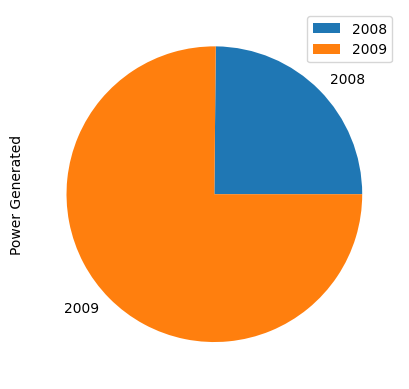

In [ ]:
subdata = data.groupby('Year').sum()['Power Generated']
subdata=subdata.to_frame()
plt.figure(figsize=(16,6))
subdata.plot(kind='pie',legend = True, subplots=True)

This code visualizes the total 'Power Generated' for each year using a pie chart

This code creates bar charts to compare the average 'Power Generated' for different 'Average Temperature (Day)' values.

<Figure size 1600x600 with 0 Axes>

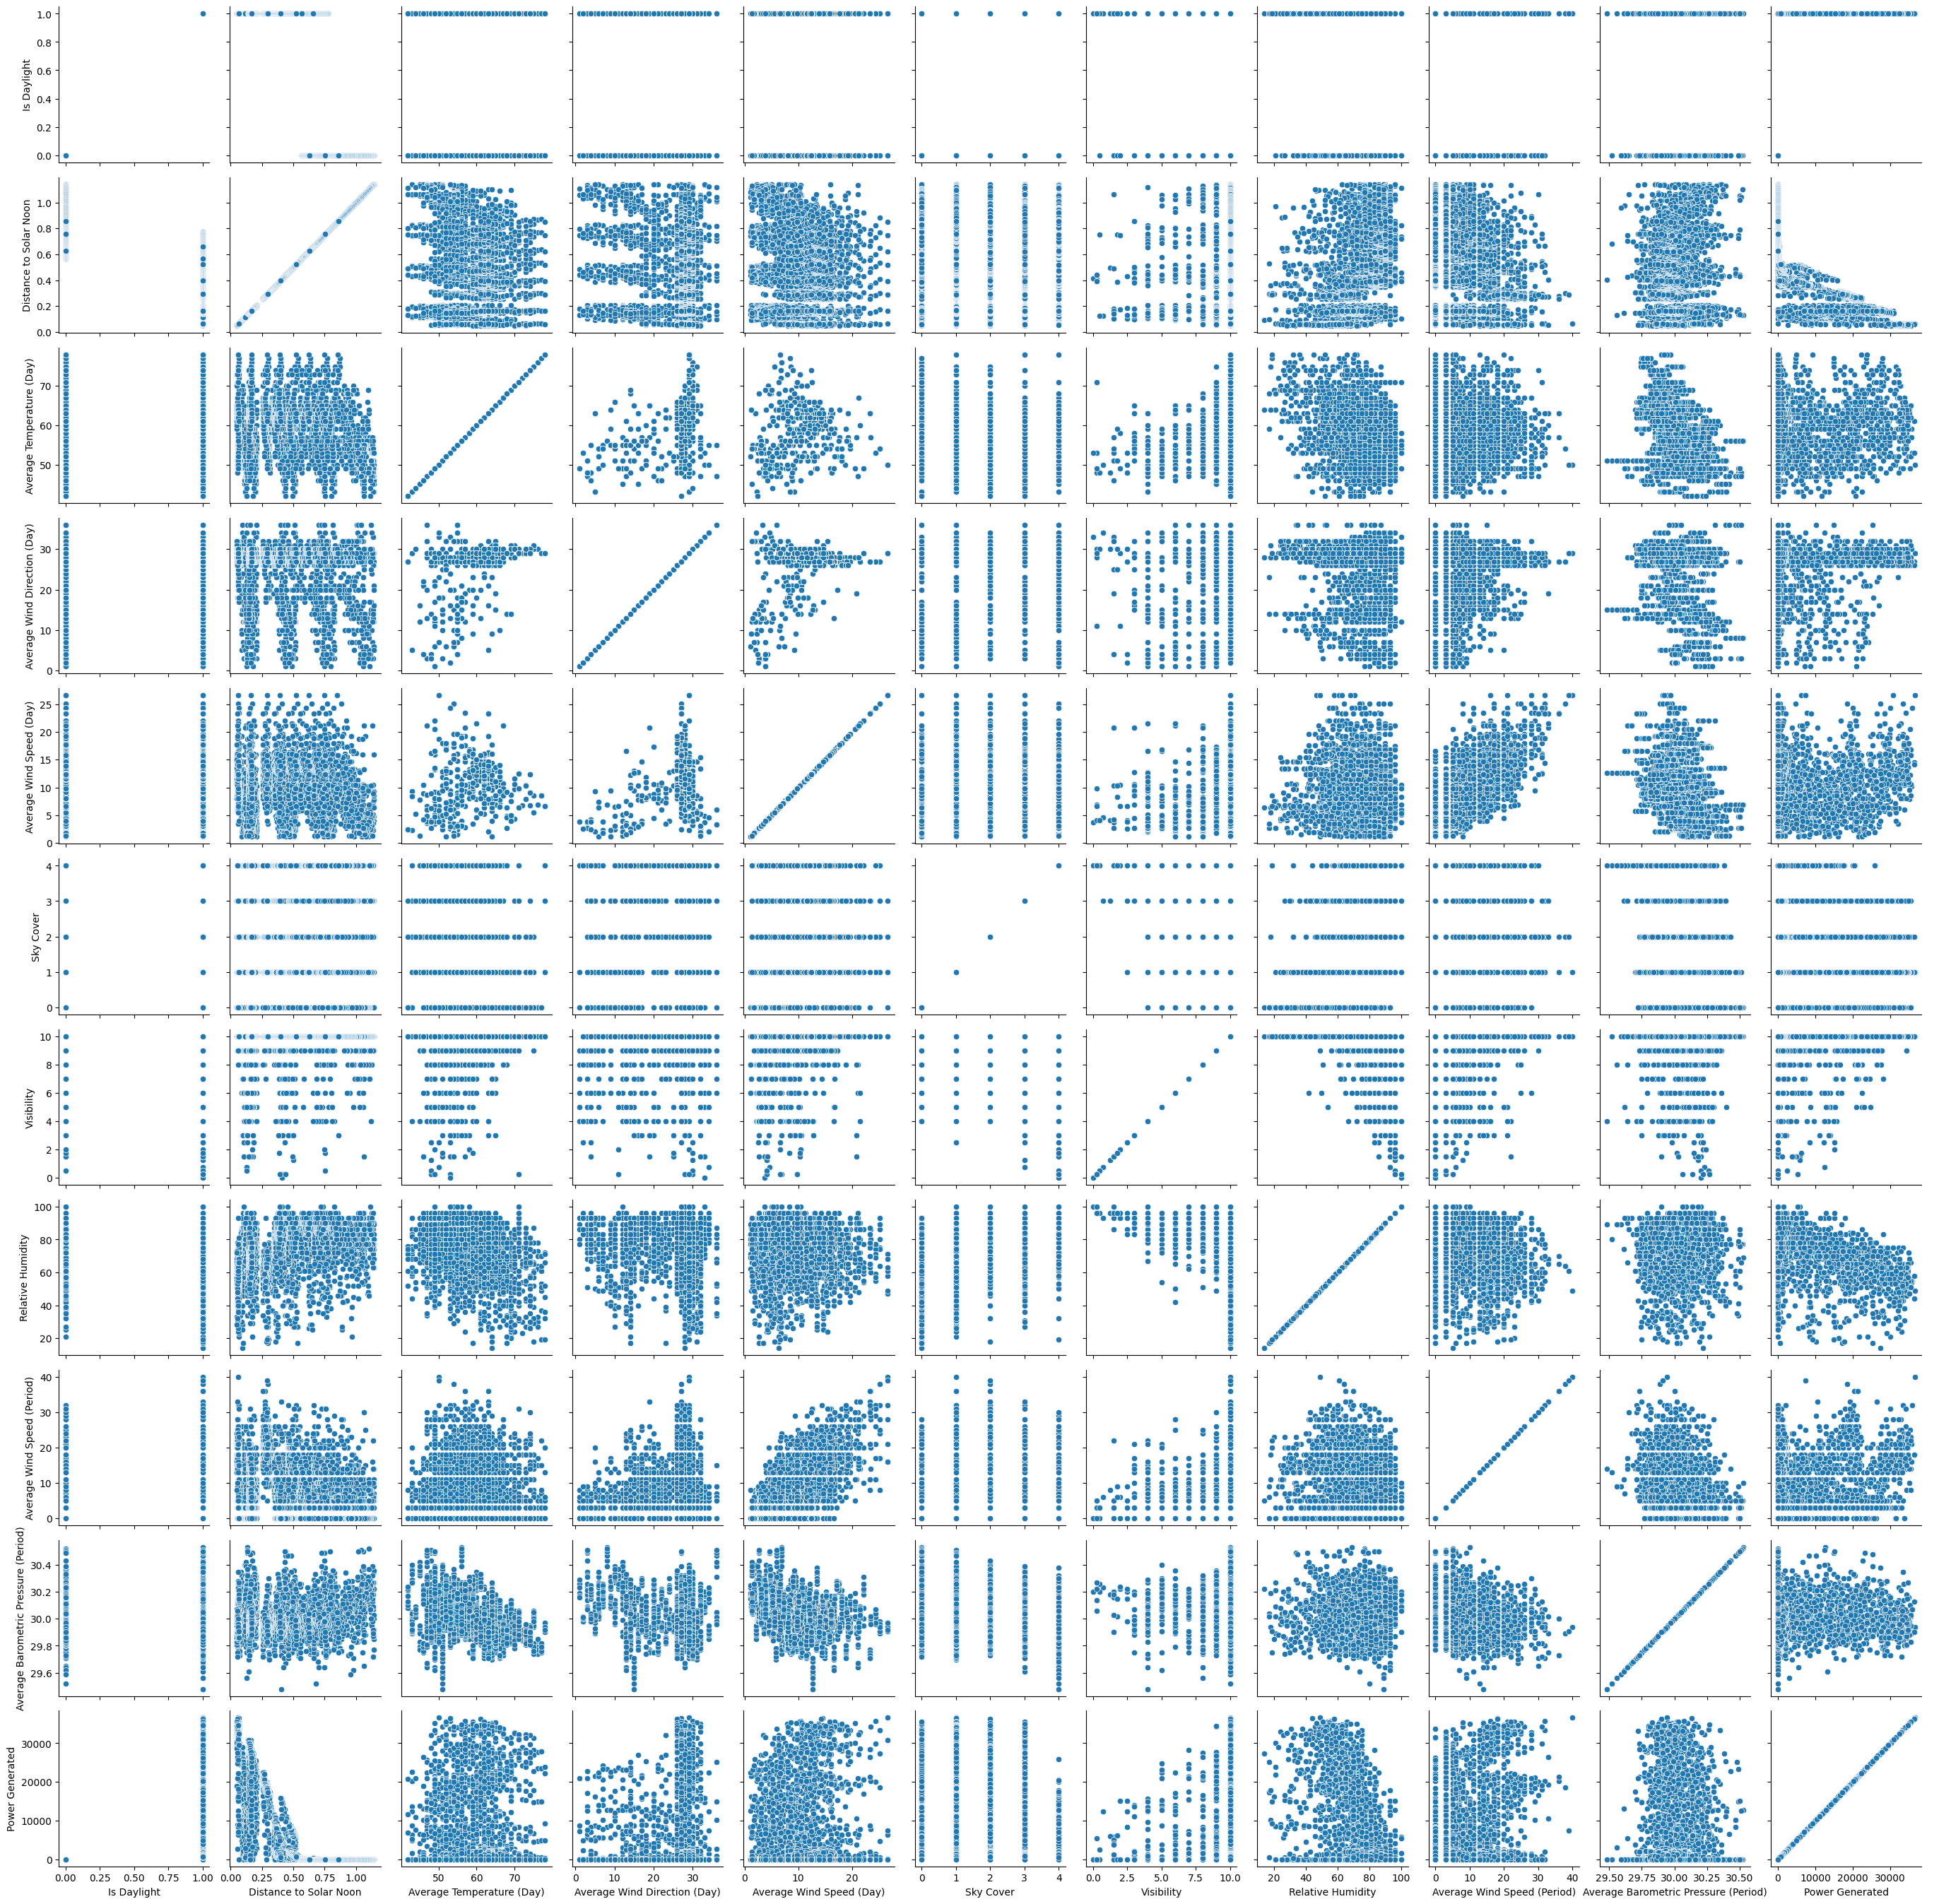

In [ ]:
sub_data = data[['Is Daylight', 'Distance to Solar Noon', 'Average Temperature (Day)', 'Average Wind Direction (Day)', 'Average Wind Speed (Day)', 'Sky Cover','Visibility', 'Relative Humidity', 'Average Wind Speed (Period)','Average Barometric Pressure (Period)', 'Power Generated']]
plt.figure(figsize=(16,6))
g = sns.PairGrid(sub_data)
g.map(sns.scatterplot)
g.add_legend()

5. Correlation Analysis

This line calculates the correlation between all numerical features in the dataset, helping to identify potential relationships between variables.

In [ ]:
data.corr()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
Day of Year,1.000000,-0.818412,0.996520,0.094129,0.000320,-0.055288,0.044453,0.257789,0.192094,-0.088287,-0.052670,-0.004226,0.031508,-0.073227,-0.122886,-0.037070
Year,-0.818412,1.000000,-0.818255,-0.001974,-0.000317,0.087559,-0.135724,-0.046688,0.005246,0.304131,0.092584,0.089275,-0.003405,0.214389,-0.069480,0.122813
Month,0.996520,-0.818255,1.000000,0.011230,0.000291,-0.055260,0.043132,0.263076,0.186718,-0.081456,-0.048429,-0.004915,0.028697,-0.068733,-0.128667,-0.036304
Day,0.094129,-0.001974,0.011230,1.000000,0.000339,0.004517,-0.000434,-0.021992,0.111685,-0.035234,-0.050991,0.027752,0.031739,-0.023474,0.037990,0.007063
First Hour of Period,0.000320,-0.000317,0.000291,0.000339,1.000000,0.173255,-0.062237,-0.000048,-0.000420,-0.000338,-0.073585,0.049903,-0.251581,0.289482,-0.033481,0.107209
Is Daylight,-0.055288,0.087559,-0.055260,0.004517,0.173255,1.000000,-0.827087,0.067295,0.056829,0.060376,0.028588,-0.086235,-0.341510,0.192290,-0.054039,0.532336
Distance to Solar Noon,0.044453,-0.135724,0.043132,-0.000434,-0.062237,-0.827087,1.000000,-0.145235,-0.118293,-0.145301,-0.015183,0.065541,0.369278,-0.214891,0.082633,-0.746825
Average Temperature (Day),0.257789,-0.046688,0.263076,-0.021992,-0.000048,0.067295,-0.145235,1.000000,0.342216,0.096194,-0.230673,0.194354,-0.221440,0.054546,-0.435728,0.132155
Average Wind Direction (Day),0.192094,0.005246,0.186718,0.111685,-0.000420,0.056829,-0.118293,0.342216,1.000000,0.340899,-0.137217,0.201546,-0.095053,0.229844,-0.271973,0.146463
Average Wind Speed (Day),-0.088287,0.304131,-0.081456,-0.035234,-0.000338,0.060376,-0.145301,0.096194,0.340899,1.000000,0.107840,0.183281,0.005676,0.673626,-0.379447,0.142366


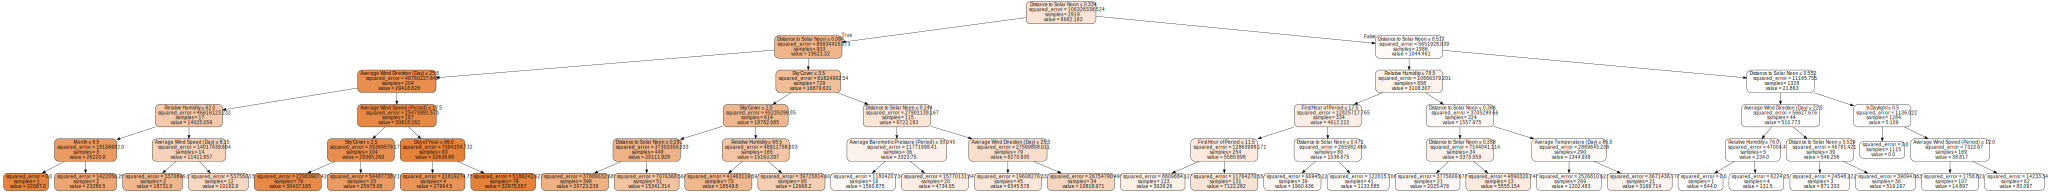

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, feature_names=features, filled=True, rounded=True, special_characters=True, out_file=None) # Removed class_names parameter
graph = graphviz.Source(dot_data)
graph

6. Model Training and Evaluation

The code then proceeds with training and evaluating different machine learning models

This part splits the data into training and testing sets, trains a KNN regressor with varying numbers of neighbors, and evaluates the model's performance using the score method. It then visualizes the scores to determine the optimal number of neighbors.

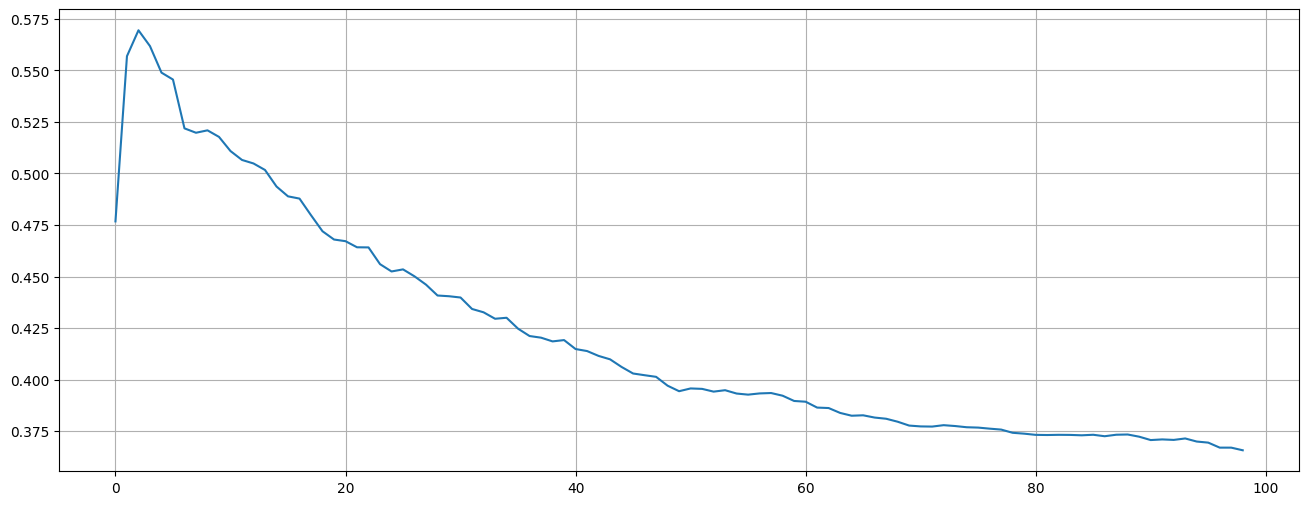

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=10) # 70% training and 30% test
score_valeus=[]
for i in range(1,100):
    model = KNeighborsRegressor(n_neighbors= i)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    score_valeus.append(score)
score_valeus
ax = np.arange(len(score_valeus))
plt.figure(figsize=(16,6))
plt.grid()
plt.plot(ax,score_valeus)

Support Vector Regression (SVR)

In [ ]:
features=[ 'First Hour of Period', 'Is Daylight', 'Distance to Solar Noon', 'Average Temperature (Day)', 'Average Wind Direction (Day)', 'Average Wind Speed (Day)', 'Sky Cover','Visibility', 'Relative Humidity', 'Average Wind Speed (Period)','Average Barometric Pressure (Period)']
X = data[features].values
y = data["Power Generated"].values
regr = svm.SVR()
regr.fit(X, y)
ypred=regr.predict(X)
p=mean_absolute_error(ypred,y)
print(p)

6936.926249307794


XGBoost Regression

In [ ]:
features=['Day of Year', 'Year', 'Month', 'Day', 'First Hour of Period', 'Is Daylight', 'Distance to Solar Noon', 'Average Temperature (Day)', 'Average Wind Direction (Day)', 'Average Wind Speed (Day)', 'Sky Cover','Visibility', 'Relative Humidity', 'Average Wind Speed (Period)','Average Barometric Pressure (Period)']
X = data[features].values
y = data["Power Generated"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=10) # 70% training and 30% test
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)
ypred = my_model.predict(X_test)
p=mean_absolute_error(ypred,y_test)
print(p)

1340.672650706865


8. Visualizing Actual vs. Predicted Values

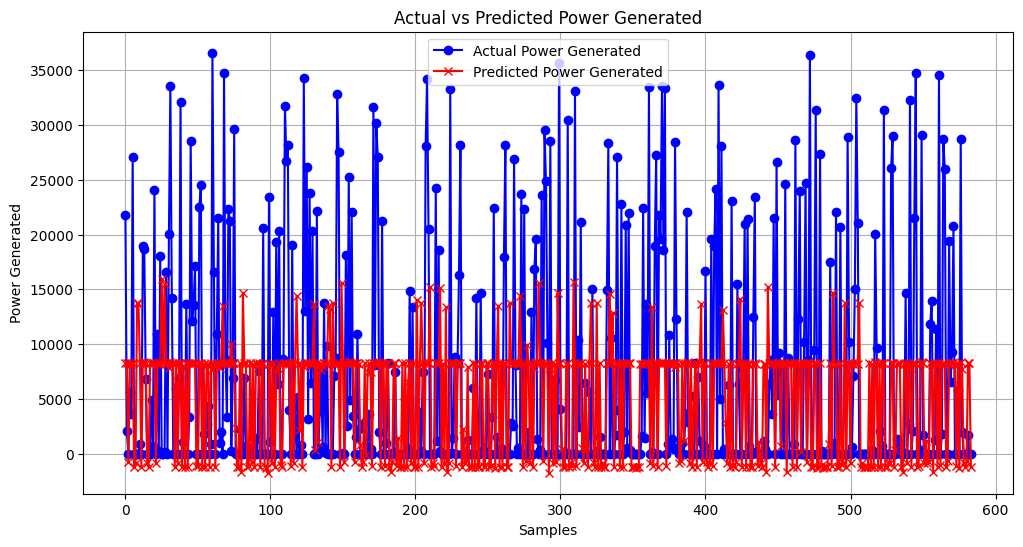

Mean Absolute Error: 6641.30


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Assuming the model has been trained and ypred contains the predicted values
ypred = my_model.predict(X_test)

# Visualize the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Power Generated', color='blue', marker='o')
plt.plot(ypred, label='Predicted Power Generated', color='red', marker='x')
plt.title('Actual vs Predicted Power Generated')
plt.xlabel('Samples')
plt.ylabel('Power Generated')
plt.legend()
plt.grid()
plt.show()

# Optional: Calculate and print additional metrics for better insight
mae = mean_absolute_error(y_test, ypred)
print(f'Mean Absolute Error: {mae:.2f}')
